# Imperative Programming

## Functional Data Processing Pipeline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('retail_sales_dataset .csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,person,34.0,Beauty,3.0,50.0,150
1,2,27/1/2023,CUST002,Female,26.0,Clothing,2.0,500.0,1000
2,3,11/2/2023,CUST003,Male,50.0,Electronics,1.0,30.0,30
3,4,5/21/2023,CUST004,NaN,37.0,NaN,1.0,500.0,500
4,5,5/6/2023,CUST005,Male,30.0,Beauty,2.0,50.0,100


### Handling Data

In [6]:
data = data.drop(columns = ['Transaction ID', 'Customer ID'],errors="ignore")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Gender            999 non-null    object 
 2   Age               996 non-null    float64
 3   Product Category  986 non-null    object 
 4   Quantity          999 non-null    float64
 5   Price per Unit    996 non-null    float64
 6   Total Amount      988 non-null    object 
dtypes: float64(3), object(4)
memory usage: 54.8+ KB


In [8]:
print(f"Number of rows :{data.shape[0]}")
print(f"Number of columns:{data.shape[1]}")

Number of rows :1000
Number of columns:7


In [9]:
data[pd.to_numeric(data['Total Amount'], errors='coerce').isna()]['Total Amount'].unique()

array([nan, ']'], dtype=object)

In [10]:
data['Total Amount'] = pd.to_numeric(data['Total Amount'], errors='coerce').astype('float64')

In [11]:
data.isnull().sum()

Date                 0
Gender               1
Age                  4
Product Category    14
Quantity             1
Price per Unit       4
Total Amount        14
dtype: int64

In [12]:
data = data.dropna()

In [13]:
data.isnull().sum()

Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [14]:
print(f"Number of duplicated rows:{sum(data.duplicated())}")

Number of duplicated rows:0


In [15]:
print(f"Number of rows after cleaning:{data.shape[0]}")

Number of rows after cleaning:963


## imprative standardize

In [16]:
data_before =  data.copy()

In [17]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)
data['Date'] = data['Date'].fillna(pd.Timestamp('1900-01-01'))
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,person,34.0,Beauty,3.0,50.0,150.0
1,2023-01-27,Female,26.0,Clothing,2.0,500.0,1000.0
2,2023-02-11,Male,50.0,Electronics,1.0,30.0,30.0
4,2023-06-05,Male,30.0,Beauty,2.0,50.0,100.0
5,1900-01-01,Female,45.0,Beauty,1.0,30.0,30.0


In [18]:
data['Gender'].unique()

array(['person', 'Female', 'Male'], dtype=object)

In [19]:
g = data['Gender'].astype(str).str.strip().str.lower()
valid = ['male', 'female']
data['Gender'] = g.where(g.isin(valid), 'unknown').str.title()

In [20]:
data['Product Category'] = data['Product Category'].str.strip().str.title()
data['Product Category'] = data['Product Category'].fillna('Unknown')

In [21]:
numeric_cols = ['Age','Quantity','Price per Unit','Total Amount']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [22]:
data['Total Amount'] = data['Quantity'] * data['Price per Unit']

In [23]:
cols_order = ['Date','Gender','Age',
              'Product Category','Quantity','Price per Unit','Total Amount']
existing_cols = [col for col in cols_order if col in data.columns]
data = data[existing_cols]
data_final=data_before.copy()

In [24]:
print("=== Data Before Standardization ===")
print(data_before.head())


=== Data Before Standardization ===
         Date  Gender   Age Product Category  Quantity  Price per Unit  \
0  24/11/2023  person  34.0           Beauty       3.0            50.0   
1   27/1/2023  Female  26.0         Clothing       2.0           500.0   
2   11/2/2023    Male  50.0      Electronics       1.0            30.0   
4    5/6/2023    Male  30.0           Beauty       2.0            50.0   
5   4/25/2023  Female  45.0           Beauty       1.0            30.0   

   Total Amount  
0         150.0  
1        1000.0  
2          30.0  
4         100.0  
5          30.0  


In [25]:
print("\n=== Standardized Data ===")
print(data.head())


=== Standardized Data ===
         Date   Gender   Age Product Category  Quantity  Price per Unit  \
0  2023-11-24  Unknown  34.0           Beauty       3.0            50.0   
1  2023-01-27   Female  26.0         Clothing       2.0           500.0   
2  2023-02-11     Male  50.0      Electronics       1.0            30.0   
4  2023-06-05     Male  30.0           Beauty       2.0            50.0   
5  1900-01-01   Female  45.0           Beauty       1.0            30.0   

   Total Amount  
0         150.0  
1        1000.0  
2          30.0  
4         100.0  
5          30.0  


## Transformations

In [26]:
# first way
def filter_by_age(data,threshold=30): 
    Filtered_data_on_Age=data[data['Age']<threshold]
    return  Filtered_data_on_Age

Age_filtered_data=filter_by_age(data,threshold=30)

In [27]:
# second way using a loop
rows = []
def filter_by_age(data, threshold=30):
    rows.clear()  
    for i in range(len(data)):
        if data.iloc[i]["Age"] < threshold:
            rows.append(data.iloc[i])
    
    return rows  

Age_filtered_data = filter_by_age(data, threshold=30)
Filtered_data_on_Age = pd.DataFrame(rows)

data=filter_by_age(data, threshold=30)

In [28]:
if isinstance(Age_filtered_data, list):
    Age_filtered_data = pd.DataFrame(Age_filtered_data)

print("=== AGE FILTERED DATA ===")
print(f"Original data: {len(data_before)} rows")
print(f"Filtered data: {len(Age_filtered_data)} rows")
print(f"Age range in filtered data: {Age_filtered_data['Age'].min()} - {Age_filtered_data['Age'].max()}")

print("\nSample of filtered data:")
print(Age_filtered_data[['Gender', 'Age']].head())

=== AGE FILTERED DATA ===
Original data: 963 rows
Filtered data: 239 rows
Age range in filtered data: 18.0 - 29.0

Sample of filtered data:
    Gender   Age
1   Female  26.0
10    Male  23.0
12    Male  22.0
16  Female  27.0
21    Male  18.0


In [29]:
print(type(data))


<class 'list'>


In [30]:
# Price filtering function
data = pd.DataFrame(
    data,
    columns=[
        'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
        'Price per Unit', 'Total Amount'
    ]
)

def filter_by_price(data, min_price=300):
    """
    Filter data based on minimum price per unit
    """
    filtered_data = data[data['Price per Unit'] >= min_price]
    return filtered_data

# Apply the filter
price_filtered_data = filter_by_price(data, 300)
data=filter_by_price(data,  min_price=300)

In [31]:
# Display results
print("=== PRICE FILTERED DATA ===")
print(f"Original data: {len(data_before)} rows")
print(f"Filtered data: {len(price_filtered_data)} rows")
print(f"Price range in filtered data: {price_filtered_data['Price per Unit'].min()} - {price_filtered_data['Price per Unit'].max()}")
print(f"Unique prices: {sorted(price_filtered_data['Price per Unit'].unique())}")

print("\nSample of filtered data:")
print(price_filtered_data[['Product Category', 'Price per Unit', 'Total Amount']].head())


=== PRICE FILTERED DATA ===
Original data: 963 rows
Filtered data: 99 rows
Price range in filtered data: 300.0 - 500.0
Unique prices: [np.float64(300.0), np.float64(500.0)]

Sample of filtered data:
   Product Category  Price per Unit  Total Amount
1          Clothing           500.0        1000.0
12      Electronics           500.0        1500.0
25      Electronics           500.0        1000.0
41         Clothing           300.0         900.0
55         Clothing           300.0         900.0


In [32]:
# Applying the 2 filters
i=0

df=data.copy()
df=pd.DataFrame(df)

price_filtred_data=filter_by_price(data,min_price=300)
price_age_filtered_data=filter_by_age(price_filtred_data, threshold=30)
# print(price_age_filtered_data)
print(f"Filtered Data (Price per Unit >= 300) & Filtered Data (Age < 30):")
print(f"Number of rows: {len(price_age_filtered_data)}")
print("\nFirst 5 rows:")
for i in range(5):
   print(price_age_filtered_data[i])


Filtered Data (Price per Unit >= 300) & Filtered Data (Age < 30):
Number of rows: 99

First 5 rows:
Date                2023-01-27
Gender                  Female
Age                       26.0
Product Category      Clothing
Quantity                   2.0
Price per Unit           500.0
Total Amount            1000.0
Name: 1, dtype: object
Date                 2023-05-08
Gender                     Male
Age                        22.0
Product Category    Electronics
Quantity                    3.0
Price per Unit            500.0
Total Amount             1500.0
Name: 12, dtype: object
Date                 2023-07-10
Gender                   Female
Age                        28.0
Product Category    Electronics
Quantity                    2.0
Price per Unit            500.0
Total Amount             1000.0
Name: 25, dtype: object
Date                1900-01-01
Gender                    Male
Age                       22.0
Product Category      Clothing
Quantity                   3.0
Price per

In [33]:
data['Age_category']=''
data=data.reset_index(drop=True)  # ensure index start from 0

In [34]:
def Compute_age_category (data):
  for i in range(len(data)):
    age=data.at[i,'Age'] #[row,column]
    if age < 25 :
      data.at[i,'Age_category']='Teen'
    elif age <=35 :
      data.at[i,'Age_category']='Young Adult'
    elif age <=55 :
      data.at[i,'Age_category']='Adult'
    else:
      data.at[i,'Age_category']='Senior'

In [35]:
Compute_age_category(data)

In [36]:
print("          === DATA WITH THE ADDED NEW AGE_CATEGORY COLUMN ===")
print(data.head(20))
print(f"Number of rows :{data.shape[0]}")

          === DATA WITH THE ADDED NEW AGE_CATEGORY COLUMN ===
          Date  Gender   Age Product Category  Quantity  Price per Unit  \
0   2023-01-27  Female  26.0         Clothing       2.0           500.0   
1   2023-05-08    Male  22.0      Electronics       3.0           500.0   
2   2023-07-10  Female  28.0      Electronics       2.0           500.0   
3   1900-01-01    Male  22.0         Clothing       3.0           300.0   
4   1900-01-01  Female  26.0         Clothing       3.0           300.0   
5   1900-01-01    Male  18.0         Clothing       4.0           300.0   
6   2023-10-02    Male  25.0      Electronics       1.0           300.0   
7   1900-01-01  Female  20.0      Electronics       4.0           500.0   
8   1900-01-01  Female  18.0           Beauty       4.0           500.0   
9   1900-01-01  Female  22.0      Electronics       1.0           500.0   
10  2023-03-02  Female  21.0         Clothing       4.0           300.0   
11  2023-11-06    Male  27.0         C

In [37]:
# AGGREGATION FOR IMPERATIVE APPROACH
print("=== IMPERATIVE APPROACH AGGREGATION ===")

# Basic statistics
print("Price per Unit Statistics:")
print(f"Count: {data['Price per Unit'].count()}")
print(f"Mean: {data['Price per Unit'].mean():.2f}")
print(f"Min: {data['Price per Unit'].min()}")
print(f"Max: {data['Price per Unit'].max()}")
print(f"Std: {data['Price per Unit'].std():.2f}")

=== IMPERATIVE APPROACH AGGREGATION ===
Price per Unit Statistics:
Count: 99
Mean: 403.03
Min: 300.0
Max: 500.0
Std: 100.46


In [38]:
# Group by Product Category
print("\nProduct Category Analysis:")
category_groups = data.groupby('Product Category')
for category, group in category_groups:
    print(f"{category}:")
    print(f"  Transactions: {len(group)}")
    print(f"  Avg Price: ${group['Price per Unit'].mean():.2f}")
    print(f"  Total Revenue: ${group['Total Amount'].sum():.2f}")
    print(f"  Total Quantity: {group['Quantity'].sum()}")


Product Category Analysis:
Beauty:
  Transactions: 32
  Avg Price: $425.00
  Total Revenue: $36200.00
  Total Quantity: 86.0
Clothing:
  Transactions: 37
  Avg Price: $386.49
  Total Revenue: $40100.00
  Total Quantity: 107.0
Electronics:
  Transactions: 30
  Avg Price: $400.00
  Total Revenue: $28500.00
  Total Quantity: 71.0


In [39]:
# Group by Gender
print("\nGender Analysis:")
gender_groups = data.groupby('Gender')
for gender, group in gender_groups:
    print(f"{gender}:")
    print(f"  Transactions: {len(group)}")
    print(f"  Avg Spending: ${group['Total Amount'].mean():.2f}")
    print(f"  Total Revenue: ${group['Total Amount'].sum():.2f}")


Gender Analysis:
Female:
  Transactions: 53
  Avg Spending: $1049.06
  Total Revenue: $55600.00
Male:
  Transactions: 46
  Avg Spending: $1069.57
  Total Revenue: $49200.00


In [40]:
# Group by Age Category
print("\nAge Category Analysis:")
age_groups = data.groupby('Age_category')
for age_cat, group in age_groups:
    print(f"{age_cat}:")
    print(f"  Transactions: {len(group)}")
    print(f"  Avg Spending: ${group['Total Amount'].mean():.2f}")
    print(f"  Total Revenue: ${group['Total Amount'].sum():.2f}")


Age Category Analysis:
Teen:
  Transactions: 55
  Avg Spending: $1127.27
  Total Revenue: $62000.00
Young Adult:
  Transactions: 44
  Avg Spending: $972.73
  Total Revenue: $42800.00


## Data Analysis


In [41]:
#Statistical summary for the data after filters 
print("=== Statistical Summary ===")
print(data.describe())

=== Statistical Summary ===
             Age   Quantity  Price per Unit  Total Amount
count  99.000000  99.000000       99.000000     99.000000
mean   23.373737   2.666667      403.030303   1058.585859
std     3.409428   1.142857      100.462751    508.902401
min    18.000000   1.000000      300.000000    300.000000
25%    21.000000   2.000000      300.000000    600.000000
50%    23.000000   3.000000      500.000000   1000.000000
75%    26.000000   4.000000      500.000000   1350.000000
max    29.000000   4.000000      500.000000   2000.000000


Insights:

-The “Female” category has the highest count, indicating stronger purchasing activity among women.

-Clothing is the top-performing product category.

In [42]:
print("\n=== Correlation Matrix ===")
corr_matrix = data.select_dtypes(include='number').corr()
pd.DataFrame(corr_matrix['Total Amount'].sort_values(ascending=False))



=== Correlation Matrix ===


,Total Amount
Total Amount,1.000000
Quantity,0.823434
Price per Unit,0.399660
Age,-0.141544



                                   === Correlation Matrix ===


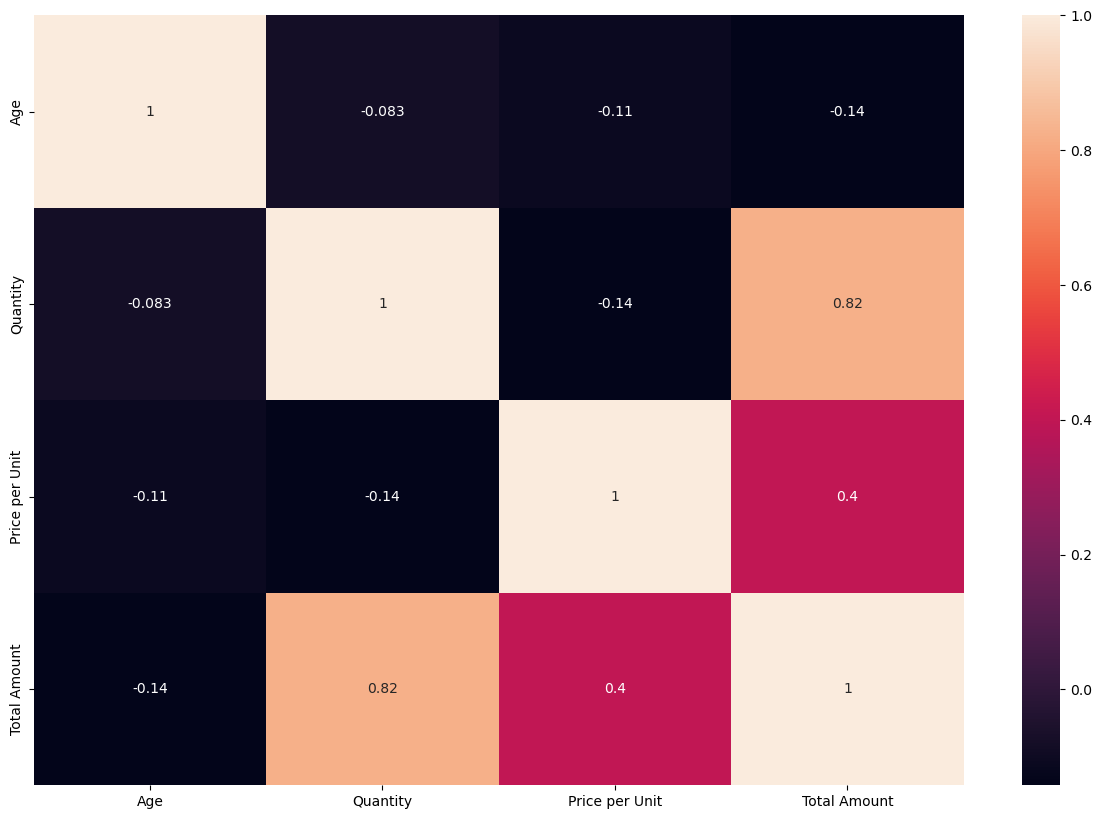

In [43]:
#Correlation matrix for the data after filters 
print("\n                                   === Correlation Matrix ===")
plt.figure(figsize=(15,10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)
plt.show()


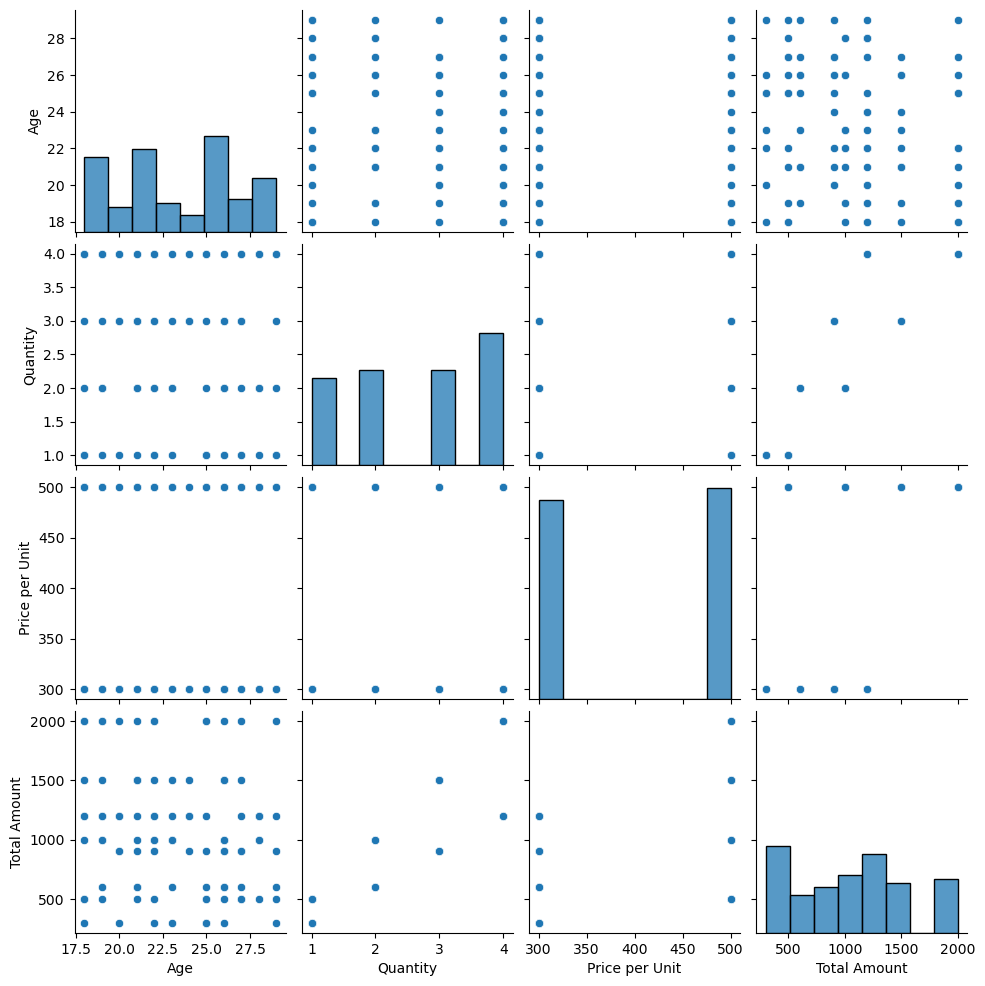

In [44]:
sns.pairplot(data)

Insight:

Strong positive correlation (0.85) → expensive items drive total sales.



=== Category Revenue Breakdown ===
  Product Category  Total Amount
1         Clothing      148155.0
2      Electronics      147455.0
0           Beauty      140925.0


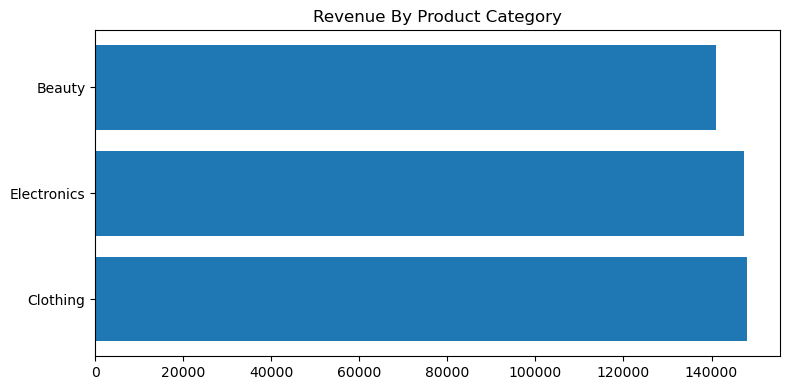

In [51]:
df = data_final.copy()

df["Total Amount"] = pd.to_numeric(df["Total Amount"], errors="coerce")

category_revenue = (
    df.groupby("Product Category")["Total Amount"]
      .sum()
      .reset_index()
      .sort_values("Total Amount", ascending=False)
)

print("\n=== Category Revenue Breakdown ===")
print(category_revenue)

plt.figure(figsize=(8,4))
plt.barh(category_revenue["Product Category"], category_revenue["Total Amount"])
plt.title("Revenue By Product Category")
plt.tight_layout()
plt.show()


In [680]:
import csv

with open("impartive_processed_data.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(data.columns)   # Header
    for row in data.values:
        writer.writerow(row)
        
print("Export complete. File saved as impartive_processed_data.csv")
print(f"Rows exported: {len(data)}")

print("\n=== FILE CONTENT ===\n")

with open("impartive_processed_data.csv", "r") as file:
    reader = csv.reader(file)
    for line in reader:
        print(line)

Export complete. File saved as impartive_processed_data.csv
Rows exported: 99

=== FILE CONTENT ===

['Date', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount', 'Age_category', 'Month']
['2023-02-27 00:00:00', 'Female', '26.0', 'Clothing', '2.0', '500.0', '1000.0', 'Young Adult', '2023-01']
['2023-08-05 00:00:00', 'Male', '22.0', 'Electronics', '3.0', '500.0', '1500.0', 'Teen', '2023-02']
['2023-10-07 00:00:00', 'Female', '28.0', 'Electronics', '2.0', '500.0', '1000.0', 'Young Adult', '2023-03']
['2023-02-17 00:00:00', 'Male', '22.0', 'Clothing', '3.0', '300.0', '900.0', 'Teen', '2023-04']
['2023-05-31 00:00:00', 'Female', '26.0', 'Clothing', '3.0', '300.0', '900.0', 'Young Adult', '2023-05']
['2023-11-13 00:00:00', 'Male', '18.0', 'Clothing', '4.0', '300.0', '1200.0', 'Teen', '2023-06']
['2023-02-10 00:00:00', 'Male', '25.0', 'Electronics', '1.0', '300.0', '300.0', 'Young Adult', '2023-07']
['2023-05-23 00:00:00', 'Female', '20.0', 'Electronics', '4.0',

In [681]:
import os
os.getcwd()

'C:\\Users\\hp\\concept project'